# Data Preparations

Download dataset menggunakan API Kaggle

In [1]:
# Load Kaggle API
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

kaggle.json


In [2]:
# Download dataset
!kaggle datasets download -d arshid/iris-flower-dataset -p /content/dataset
!unzip "/content/dataset/iris-flower-dataset.zip" -d "/content/dataset/"

  0% 0.00/0.99k [00:00<?, ?B/s]
100% 0.99k/0.99k [00:00<00:00, 1.88MB/s]
Archive:  /content/dataset/iris-flower-dataset.zip
  inflating: /content/dataset/IRIS.csv  


Import module python yang akan digunakan

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn

Dataset dijadikan dataframe pandas df, features pada dataset dijadikan variable x dan labels pada data dijadikan variable y

In [4]:
# load dataset as pandas dataframe
df = pd.read_csv ('/content/dataset/IRIS.csv')
df.info()

# features to x var
x = df.iloc[:, [0,1,2,3]].values
# labels to y var
y = df.iloc[:, -1].values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Dilakukan visualisasi data yang digunakan, dapat dilihat bahwa tiap species tanaman masing-masing memiliki jumlah sebesar 33.3%

Dilakukan juga visualisasi distribusi panjang dan lebar petal bunga, dan dapat dilihat bahwa Iris-setosa cenderung memiliki petal yang berukuran kecil, Iris-Versicolor cenderung berukuran sedang, dan Iris-virginica cenderung berukuran besar

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: species, dtype: int64


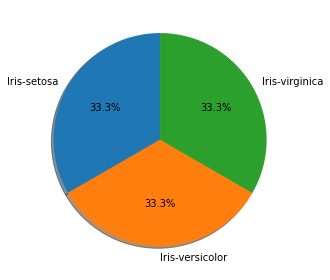

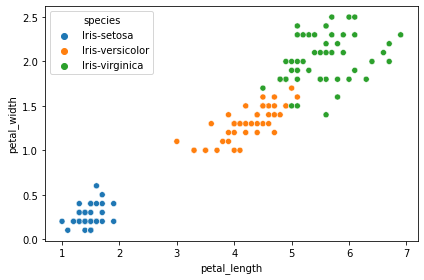

In [5]:
print(df.species.value_counts())

# visualisasi species tanaman
fig1, ax1 = plt.subplots()
ax1.pie(df.species.value_counts(), labels=df.species.unique(), autopct='%1.1f%%', shadow=True, startangle=90)
plt.tight_layout()

# distribusi panjang dan lebar petal bunga
fig1, ax1 = plt.subplots()
sns.scatterplot(x=df.petal_length, y=df.petal_width, hue=df.species)
plt.tight_layout()

Lakukan feature encoding pada label 'species'

In [6]:
from sklearn.preprocessing import LabelEncoder

# encoding labels pada kolom species
label_encoding = LabelEncoder()
df['species'] = label_encoding.fit_transform(df['species'])
df.sample(6)

,sepal_length,sepal_width,petal_length,petal_width,species
48,5.3,3.7,1.5,0.2,0
79,5.7,2.6,3.5,1.0,1
13,4.3,3.0,1.1,0.1,0
56,6.3,3.3,4.7,1.6,1
61,5.9,3.0,4.2,1.5,1
9,4.9,3.1,1.5,0.1,0


Saya menggunakan Train-Test Split dengan data Training: 85%, Data Uji: 25%

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Naive-Bayes Classifier

In [8]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [9]:
y_pred  =  classifier.predict(X_test)

In [10]:
# classification report, accuracy score, dan confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      macro avg       1.00      1.00      1.00        38
   weighted avg       1.00      1.00      1.00        38

[[13  0  0]
 [ 0 16  0]
 [ 0  0  9]]


# Kernel SVM

In [11]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [12]:
y_pred = svclassifier.predict(X_test)

In [13]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
